In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
movies = pd.read_csv("fandango_score_comparison.csv")
movies.columns

Index([u'FILM', u'RottenTomatoes', u'RottenTomatoes_User', u'Metacritic',
       u'Metacritic_User', u'IMDB', u'Fandango_Stars', u'Fandango_Ratingvalue',
       u'RT_norm', u'RT_user_norm', u'Metacritic_norm', u'Metacritic_user_nom',
       u'IMDB_norm', u'RT_norm_round', u'RT_user_norm_round',
       u'Metacritic_norm_round', u'Metacritic_user_norm_round',
       u'IMDB_norm_round', u'Metacritic_user_vote_count',
       u'IMDB_user_vote_count', u'Fandango_votes', u'Fandango_Difference'],
      dtype='object')

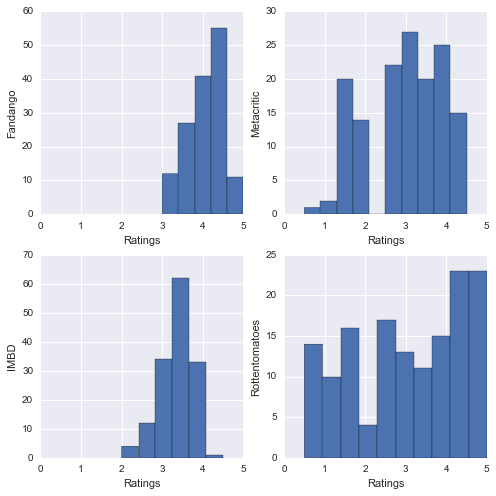

In [10]:
fig_rg = plt.figure(figsize=(8,8))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)
ax1_rg.hist(movies["Fandango_Stars"],bins =5 )
ax2_rg.hist(movies["Metacritic_norm_round"])
ax3_rg.hist(movies["IMDB_norm_round"],bins = 6)
ax4_rg.hist(movies['RT_norm_round'])
ax1_rg.set_xlim([0,5])
ax2_rg.set_xlim([0,5])
ax3_rg.set_xlim([0,5])
ax4_rg.set_xlim([0,5])
ax1_rg.set_xlabel("Ratings")
ax1_rg.set_ylabel("Fandango")
ax2_rg.set_xlabel("Ratings")
ax2_rg.set_ylabel("Metacritic")
ax3_rg.set_xlabel("Ratings")
ax3_rg.set_ylabel("IMBD")
ax4_rg.set_xlabel("Ratings")
ax4_rg.set_ylabel("Rottentomatoes")
plt.show()

In [12]:
f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()
IMDB_mean = movies["IMDB_norm_round"].mean()
RT_mean = movies["RT_norm_round"].mean()
IMDB_median = movies["IMDB_norm_round"].median()
RT_median = movies["RT_norm_round"].median()
print(f_mean)
print(f_median)
print(m_mean)
print(m_median)
print(IMDB_mean)
print(IMDB_median)
print(RT_mean)
print(RT_median)


4.08904109589
4.0
2.97260273973
3.0
3.3801369863
3.5
3.06506849315
3.0


# Direct Comparison
Fandango movies have higher average and median. Also Fandango's mean is .089 higher than its median,showing us a skew towards the right greater than Rotten Tomatos skew of .065. This demonstrates more high scores are pulling Fandango's mean up

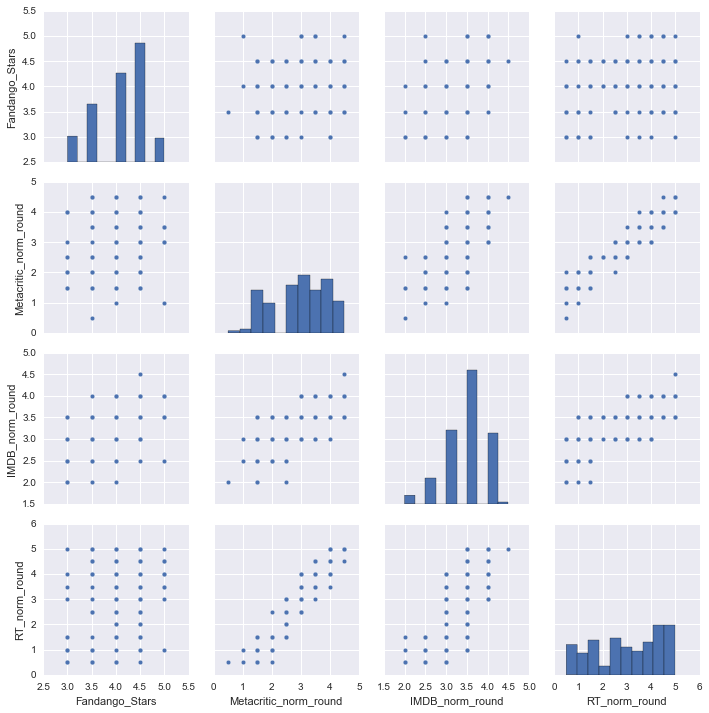

In [4]:
sns.pairplot(movies[['Fandango_Stars','Metacritic_norm_round','IMDB_norm_round','RT_norm_round']])
sns.plt.show()

From a glance we can tell that all the scores seem to have some sort of linear relationship with one another except for Fandango Stars

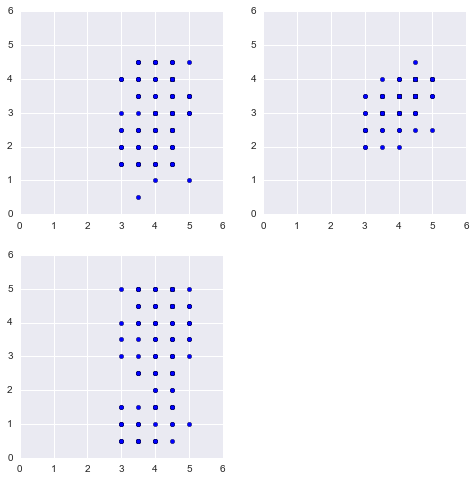

In [6]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.set_xlim(0,6.0)
ax2.set_xlim(0,6.0)
ax3.set_xlim(0,6.0)
ax1.set_ylim(0,6.0)
ax2.set_ylim(0,6.0)
ax3.set_ylim(0,6.0)
ax1.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
ax2.scatter(movies["Fandango_Stars"], movies["IMDB_norm_round"])
ax3.scatter(movies["Fandango_Stars"], movies['RT_norm_round'])

Closer look at graphs against Fandango to confirm our results.

In [64]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
r1_value, p1_value = pearsonr(movies["Fandango_Stars"], movies['RT_norm_round'])
r2_value, p2_value = pearsonr(movies["Fandango_Stars"], movies["IMDB_norm_round"])
r3_value, p3_value = pearsonr(movies["IMDB_norm_round"], movies["Metacritic_norm_round"])
r4_value, p4_value = pearsonr(movies["IMDB_norm_round"], movies['RT_norm_round'])
r5_value, p5_value = pearsonr(movies["Metacritic_norm_round"], movies["RT_norm_round"])
print(r_value,r1_value,r2_value,r3_value,r4_value,r5_value)

(0.17844919073895918, 0.30042744712335778, 0.56627271692521819, 0.69239971524852129, 0.74390025932619308, 0.94660020195309291)


# How Linear? 
From the graph we see Fandgo movie reviews are quite different from Metacritic, Rotten Tomatoes, and IMDB scores. A score of -1 correlates to negatively linear while +1 correlates to linear. Scores closer to zero correspond to no little correlation. The first 3 values above corresponds to the three different ratings compared to Fandango, while the next three correspond to Metacritic, Rotten Tomatoes, and IMDB compared with one another. The lowest Pearson score among this group was 0.69, much larger than the highest correlation given by Fandango at .57.

In [16]:
movies["fm_diff"] = np.abs(movies['Metacritic_norm_round'] - movies["Fandango_Stars"])
movies.sort("fm_diff", ascending=False).head(10)


/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,IMDB_diff,fm_diff,RT_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,2.5,2.5,31,3136,1793,0.5,2.5,4.0,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.5,3.0,3.5,38,5927,811,0.2,1.0,3.0,3.5
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,2.5,2.5,108,19222,6835,0.3,2.0,3.0,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.5,2.5,3.0,246,19521,3886,0.4,1.5,3.0,3.5
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,2.5,3.5,49,25214,2603,0.0,1.0,3.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,1.0,2.0,211,15004,3054,0.0,1.5,3.0,3.0
35,The Loft (2015),11,40,24,2.4,6.3,4.0,3.6,0.55,2.00,...,1.0,1.0,3.0,80,21319,811,0.4,1.0,3.0,3.5
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,1.5,2.5,3.0,240,104235,6757,0.4,1.5,3.0,4.0
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,4.5,4.4,1.35,3.30,...,2.0,1.5,3.5,126,37292,6506,0.1,1.0,2.5,3.0
51,Entourage (2015),32,68,38,5.2,7.1,4.5,4.2,1.60,3.40,...,2.0,2.5,3.5,96,21914,4279,0.3,1.0,2.5,3.0


In [17]:
movies["IMDB_diff"] = np.abs(movies['IMDB_norm_round'] - movies["Fandango_Stars"])
movies.sort("IMDB_diff", ascending=False).head(10)

/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,IMDB_diff,fm_diff,RT_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,2.5,2.5,31,3136,1793,0.5,2.5,4.0,4.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,2.5,2.5,108,19222,6835,0.3,2.0,3.0,3.0
97,Fifty Shades of Grey (2015),25,42,46,3.2,4.2,4.0,3.9,1.25,2.10,...,2.5,1.5,2.0,778,179506,34846,0.1,2.0,1.5,2.5
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,1.5,2.5,3.0,240,104235,6757,0.4,1.5,3.0,4.0
53,Hot Pursuit (2015),8,37,31,3.7,4.9,4.0,3.7,0.40,1.85,...,1.5,2.0,2.5,78,17061,2618,0.3,1.5,2.5,3.5
33,The Boy Next Door (2015),10,35,30,5.5,4.6,4.0,3.6,0.50,1.75,...,1.5,3.0,2.5,75,19658,2800,0.4,1.5,2.5,3.5
72,American Sniper (2015),72,85,72,6.6,7.4,5.0,4.8,3.60,4.25,...,3.5,3.5,3.5,850,251856,34085,0.2,1.5,1.5,1.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.5,4.0,3.5,249,65709,12640,0.5,1.5,1.5,0.5
46,The Divergent Series: Insurgent (2015),30,61,42,5.4,6.4,4.5,4.2,1.50,3.05,...,2.0,2.5,3.0,206,89618,7123,0.3,1.5,2.5,3.0
21,Insidious: Chapter 3 (2015),59,56,52,6.9,6.3,4.5,4.1,2.95,2.80,...,2.5,3.5,3.0,115,25134,3276,0.4,1.5,2.0,1.5


In [18]:
movies["RT_diff"] = np.abs(movies['RT_norm_round'] - movies["Fandango_Stars"])
movies.sort("RT_diff", ascending=False).head(10)

/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,IMDB_diff,fm_diff,RT_diff
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,1.5,2.5,3.0,240,104235,6757,0.4,1.5,3.0,4.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,2.5,2.5,31,3136,1793,0.5,2.5,4.0,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.5,3.0,3.5,38,5927,811,0.2,1.0,3.0,3.5
33,The Boy Next Door (2015),10,35,30,5.5,4.6,4.0,3.6,0.50,1.75,...,1.5,3.0,2.5,75,19658,2800,0.4,1.5,2.5,3.5
53,Hot Pursuit (2015),8,37,31,3.7,4.9,4.0,3.7,0.40,1.85,...,1.5,2.0,2.5,78,17061,2618,0.3,1.5,2.5,3.5
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,4.0,3.9,0.35,2.45,...,1.5,1.5,3.0,67,4260,917,0.1,1.0,2.5,3.5
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.5,2.5,3.0,246,19521,3886,0.4,1.5,3.0,3.5
35,The Loft (2015),11,40,24,2.4,6.3,4.0,3.6,0.55,2.00,...,1.0,1.0,3.0,80,21319,811,0.4,1.0,3.0,3.5
60,Unfinished Business (2015),11,27,32,3.8,5.4,3.5,3.2,0.55,1.35,...,1.5,2.0,2.5,39,14346,821,0.3,1.0,2.0,3.0
49,Terminator Genisys (2015),26,60,38,6.4,6.9,4.5,4.2,1.30,3.00,...,2.0,3.0,3.5,779,85585,6272,0.3,1.0,2.5,3.0


We now observe which movies share the highest differences